<a id="nbtop"></a>
# Exercise 4: Introduction to Object-Oriented Programming

## Contents:
* [Introduction](#nbintro)
* [Defining a grid](#nbdefgrid)  
* [The procedual way](#nbprodway)
* [The OOP way](#nboopway)
* [Add methods](#nbaddmethod)
* [Encapsulation](#nbencap)
* [Adding more features](#nbaddfeat)
    * [OOP-specific features: Expected behaviour](#nboop_spec1)
    * [OOP-specific features: Initialisation](#nboop_spec2)
    * [OOP-specific features: Operator overloading](#nboop_spec3)
* [Intuitive naming](#nbintuitive)
* [Exercise](#nbex)
    * [Define hydraulic head](#nbhead)
    * [Set aquifer properties](#nbaquifer)
    * [Set a well](#nbwell)
* [Summary](#nbsummary)



<a id="nbintro"></a>
## Introduction
We used Python so far for relatively simple scripting with the addition of an occasional function. Generally, we have been following what is called a **procedural programming** style: we define functions that combine several steps into a procedure that can be called and executed. Basically, the program execution follows a "top-down" approach: from defining some variables, we execute procedures (functions) that operate on these variables, collect the output, perform some other procedures, etc.

This type of programming style is very common in scientific programming and there is nothing wrong with it: in fact, it is used successfully in highly complex scientific simulations. An advantage of this way of programming is that it usually follows a logical structure and is quite intuitive to follow.

There is, however, another programming style that you have surely heard of: **object-oriented programming** (often abbreviated as OOP). Whereas in procedural programming we define variables and break down parts of codes in common functions/ procedures (often with the aim to ensure as much code re-use as possible), those two parts are (mostly) combined into single objects in OOP. 

If you think that this sounds strange then you are not alone - at first, OOP seems to be a lot of work without a clear benefit. However, once you get used to it, OOP  can lead to very efficient code re-use and clear code structures.

Most importantly, once you have gone through the hard work of defining classes, then using the objects in the program becomes the easier part.

In this notebook, we'll have a look at some of the basic concepts of OOP in Python and some examples to give you a feel for how it works - and to see some of the advantages that you can get out of this programming style.

A really good series of video introduction on OOP is given by Corey Schaefer (if you click the image below, the youtube playlist will open in a new tab):

[![Python OOP](https://img.youtube.com/vi/ZDa-Z5JzLYM/0.jpg)](https://www.youtube.com/watch?v=ZDa-Z5JzLYM&list=PL-osiE80TeTsqhIuOqKhwlXsIBIdSeYtc "Python OOP")

In [1]:
from IPython.core.display import HTML
css_file = 'nre2_style.css'
HTML(open(css_file, "r").read())

In [2]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np

If you like, use the following cells to register the "new" colormap again:

In [8]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.register_cmap(name='magma', cmap=cmaps.magma)
plt.set_cmap(cmaps.viridis)

<a id="nbdefgrid"></a>
## Defining a grid for numerical simulations

We'll start straight away with the definition of a type of object that might actually be useful in the following parts of this course: the definition of a grid for numerical simulations.

The simplest grid that can be used for numerical simulations is a completely regular grid with cell sizes that do not change along an axis direction:

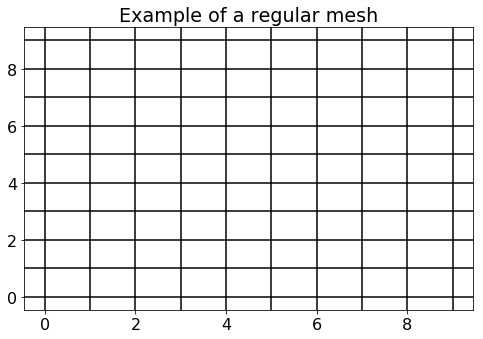

In [2]:
fig = plt.figure(figsize=(7,5))
plt.rcParams['font.size'] = 16
ax1 = fig.add_subplot(111)

for i in range(10):
    ax1.axvline(i,c='k')
    ax1.axhline(i,c='k')
    
ax1.set_title("Example of a regular mesh")

plt.tight_layout()

Note that the cell width (let's call it $dx$) and hight ($dy$) can be different - but they are constant for all cells.

Which kind of information do we need to represent this grid? As minimal requirements, we need:

- the cell dimensions $dx$ and $dy$
- the number of cells in each direction, $nx$, $ny$
- some way to store the data of the cell values

In this notebook, we will use both a procedural and an object-oriented approach to deal with the data in this grid to clarify the differences between (and advantages of) the approaches.

First, we will define the grid properties that we need - and generate some random grid values to work with:


In [3]:
dx = 100
dy = 100
nx = 10
ny = 10
grid_data = np.random.randint(0,10,size= (nx, ny))

We generated some random grid data with the command `np.random.randint`, in this case: random integer values between 0 and 10, stored in a 2-D array of size (nx, ny). Here just a quick view of the generated random grid:

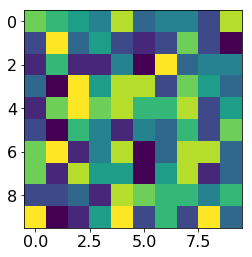

In [4]:
plt.imshow(grid_data, interpolation = 'nearest', cmap='viridis')

<a id="nbprodway"></a>
## The procedural way: storing data in a dictionary

We will first look at the procedural implementation of this grid data. Of course, we could simply work with the variables that we already defined above and use functions that directly work with these variables - but we would have to pass a lot of variables around. Also, when we define a second grid (as we will do in a second), we'd have to have a new name for all variables (e.g. `nx_grid_2`, `dx_grid_2`, etc.). 

One possibility to combine several variables for simpler procedural programming applications is to store the information in a Python dictionary: 

In [5]:
grid_dict = {'dx' : dx, 
             'dy' : dy, 
             'nx' : nx, 
             'ny' : ny, 
             'grid_data' : grid_data}

We can now have a look at all the data in the grid and, of course, access the single variables with the common dictionary access methods (e.g. `grid_dict['nx']` to get the nx values):

In [8]:
print(grid_dict)
print("Number of grid cells in x-direction: %d" % grid_dict['nx'])

{'dx': 100, 'dy': 100, 'nx': 10, 'ny': 10, 'grid_data': array([[7, 6, 5, 4, 8, 3, 4, 4, 2, 8],
       [2, 9, 3, 5, 2, 1, 2, 7, 2, 0],
       [1, 6, 1, 1, 4, 0, 9, 3, 4, 4],
       [3, 0, 9, 5, 8, 8, 2, 7, 5, 3],
       [1, 7, 9, 7, 8, 6, 6, 8, 2, 5],
       [2, 0, 6, 4, 1, 4, 3, 6, 2, 7],
       [7, 9, 1, 4, 8, 0, 3, 8, 8, 3],
       [7, 1, 8, 5, 5, 0, 5, 8, 1, 3],
       [2, 2, 3, 1, 8, 7, 6, 6, 4, 6],
       [9, 0, 1, 5, 9, 2, 6, 2, 9, 3]])}
Number of grid cells in x-direction: 10


<a id="nboopway"></a>
## The OOP-way: creating a class for numerical grids

Before we start looking at more complex object-oriented programming concepts, we will first simply replicate the storage of the grid information as above, but this time within a defined grid class.

The absolutely simplest way to create a class is not so different to a dictionary:



In [9]:
class Grid():
    pass

The previous line is the blueprint for a class that, basically, does absolutely nothing (if you want Python to do nothing, you simply write `pass`)...

However, we can now create an instance (object) of the class and then add the information that we want to store:

In [10]:
# create an instance of the grid
grid_obj = Grid()
# now: store information as grid attributes:
grid_obj.nx = nx
grid_obj.ny = ny
grid_obj.dx = dx
grid_obj.dy = dy
grid_obj.grid_data = grid_data

We can now access the grid information. Here the first difference: if we simply use a `print` statement as above, we get information *about the object class* - and not about the data:

In [11]:
print(grid_obj)

To get the data, we can use the '.'-operator to access the object attributes:

In [17]:
print "Number of grid cells in x-direction: %d" % grid_obj.nx

Number of grid cells in x-direction: 10


And we can actually get all variables back as a dictionary - and get a very similar printout to before:

In [12]:
print(grid_obj.__dict__)

{'nx': 10, 'ny': 10, 'dx': 100, 'dy': 100, 'grid_data': array([[7, 6, 5, 4, 8, 3, 4, 4, 2, 8],
       [2, 9, 3, 5, 2, 1, 2, 7, 2, 0],
       [1, 6, 1, 1, 4, 0, 9, 3, 4, 4],
       [3, 0, 9, 5, 8, 8, 2, 7, 5, 3],
       [1, 7, 9, 7, 8, 6, 6, 8, 2, 5],
       [2, 0, 6, 4, 1, 4, 3, 6, 2, 7],
       [7, 9, 1, 4, 8, 0, 3, 8, 8, 3],
       [7, 1, 8, 5, 5, 0, 5, 8, 1, 3],
       [2, 2, 3, 1, 8, 7, 6, 6, 4, 6],
       [9, 0, 1, 5, 9, 2, 6, 2, 9, 3]])}


Ok, what we have done now is, basically, very similar to using a dictionary above: we simply have a "container" to store the relevant information of the grid. However, we will make this container a lot more sophisticated while we go along - and add features that are specific to object-oriented programming.

<a id="nbaddmethod"></a>
## Adding class methods to access data

The first difference that we will now look at is typical (but not essential!) for object-oriented programming: instead of simply adding variables as before with the '.'-operator, we write class methods (functions) to store and access the data. 

I am sure that you'll wonder about what exactly this should be good for. Basically, there are two reasons:

1. We can "hide" the actual place where (and how) we store information from the user - mostly to make the access clearer and easier (this is the OOP concept of "encapsulation")
2. It is possible to directly react to the supplied data, e.g. to check for consistency, to react to different data types, etc.

Let's start with the description of class methods to add the variables:

In [15]:
# The keyword "class" is used to start the class definition, followed by the name:
class Grid():
    # we now define the class methods (i.e. the functions)
    def set_grid(self,grid_data):
        self.grid_data = grid_data
        
    def set_nxny(self, nx, ny):
        self.nx = nx
        self.ny = ny
        self.say_something("hello")
        
    def set_dxdy(self, dx, dy):
        self.dx = dx
        self.dy = dy
    
    def say_something(self,string):
        print(string)


We now call these methods to assign data to the object:

In [16]:
# re-create the object to consider the new methods:
grid_obj = Grid()
# now, add data:
grid_obj.set_nxny(nx, ny)
grid_obj.set_dxdy(dx, dy)
grid_obj.set_grid(grid_data)

hello


Here is the first advantage of using this approach to store data: we can include simple checks of the data type. There are several ways to do this. What we will use below is already a quite advanced way of dealing with errors: "exception handling". If some condition is not met, we "raise" an error - an this causes the execution to abort:

    raise AttributeError("Some error description")

This is an advanced topic and you don't have to understand the details now - we will see below what happens:

In [17]:
class Grid():
    # we now define the class methods (i.e. the functions)
    def set_grid(self,grid_data):
        # before we store the data, let's check if it is actually a 2-D array.
        # 1) check that the object is a numpy array:
        if type(grid_data) != np.ndarray:
            raise AttributeError("The provided grid data is of the wrong type!")
        # 2) check that it is of dimension 2:
        if grid_data.ndim != 2:
            raise AttributeError("The numpy array is not of dimension 2!")
        self.grid_data = grid_data
        
        
    def set_nxny(self, nx, ny):
        self.nx = nx
        self.ny = ny
        
    def set_dxdy(self, dx, dy):
        self.dx = dx
        self.dy = dy

If we now pass the wrong type or the wrong dimension, then (a) the object will not be created, and (b) we get some information on the problem:

In [18]:
# wrong object
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
grid_obj.set_grid("a") # grid_data)
grid_obj.set_dxdy(dx, dy)

AttributeError: The provided grid data is of the wrong type!

In [19]:
# wrong dimension
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
grid_obj.set_grid(np.array([1,2,3])) # grid_data)
grid_obj.set_dxdy(dx, dy)

AttributeError: The numpy array is not of dimension 2!

So what we get with these methods is now an automatic testing of the variables that are stored in our object - with the same object method that we use to add the data. 

Of course, we could replicate this behaviour with a procedural equivalent: we could write a function that adds the data to the dictionary and does these checks, e.g.:

In [20]:
def add_grid_to_dict(grid_dict, grid_data):
    """Add grid data to grid dictionary"""
    # now: perform checks, exactly the same code as above:
    # 1) check that the object is a numpy array:
    if type(grid_data) != np.ndarray:
        raise AttributeError("The provided grid data is of the wrong type!")
    # 2) check that it is of dimension 2:
    if grid_data.ndim != 2:
        raise AttributeError("The numpy array is not of dimension 2!")
    # if no errors were raised, add the data:
    grid_dict['grid_data'] = grid_data

    

In [21]:
# wrong object
add_grid_to_dict(grid_dict, "a")

AttributeError: The provided grid data is of the wrong type!

In [31]:
# wrong dimension
add_grid_to_dict(grid_dict, np.ndarray([1,2,3]))

AttributeError: The numpy array is not of dimension 2!

So: we get a similar possibility to perform checks: both with the procedural style of writing a function, as with the object-oriented style. The main difference at the moment is that we have to execute a separate function for the procedural style (`add_grid_to_dict`), whereas the object oriented method performs the step automatically. 

We will now look at a slightly different implementation to highlight the difference of the approaches.

<a id="nbencap"></a>
## Encapsulation and private data in OOP

Let's assume that we would like to force the tests for consistency (for data type and grid dimension) to be executed. In the case of the dictionary implementation, nobody forces you to use the `add_grid_to_dict` function that performs the tests. You can always just add the grid yourself to the dictionary (and this is actually the simpler approach - as you don't have to remember the name of the function, so: people *will* do it!).

For the OOP implementation, we can - at least in principle - strongly suggest that the tests are executed when the data is added. This approach is based on encapsulation.

The general idea in OOP encapsulation is that, as a convention, variables and data are added and extracted from an object with access methods (for example our `set_nxny()` function above, etc.) and not accessed "in place". 

For example: we could, theoretically, set the `nx` and `ny` values of our grid class directly:



In [23]:
grid_obj = Grid()
grid_obj.nx = nx
grid_obj.ny = ny
print(dir(grid_obj))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'nx', 'ny', 'set_dxdy', 'set_grid', 'set_nxny']


Now, in Python there is a way to store data and mark them as "protected": an **underscore** (or double underscore) is **added as a prefix** to the class variable name, i.e. instead of:

        
    def set_nxny(self, nx, ny):
        self.nx = nx
        self.ny = ny

we can write:

        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny

Using these variables is a basic Python **convention: do not change variables with a leading underscore** outside the class definition!


Here an example implementation:


In [24]:
# Adjusted grid class

class Grid():
    # we now define the class methods (i.e. the functions)
    def set_grid(self,grid_data):
        # before we store the data, let's check if it is actually a 2-D array.
        # 1) check that the object is a numpy array:
        if type(grid_data) != numpy.ndarray:
            raise AttributeError("The provided grid data is of the wrong type!")
        # 2) check that it is of dimension 2:
        if grid_data.ndim != 2:
            raise AttributeError("The numpy array is not of dimension 2!")
        self._grid_data = grid_data
        
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy


Note that, *in principle*, you could still access and change the variable `grid_obj._nx' directly:

In [26]:
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
print(grid_obj.__dict__)
grid_obj._nx = 2
print(grid_obj.__dict__)

{'_nx': 10, '_ny': 10}
{'_nx': 2, '_ny': 10}


**BUT**: the leading underscore of a class variable tells you that *you should not change it directly* - but rather use the appropriate functions (e.g. the `grid_obj.set_nxny()` function).

If you still change it: *your responsibility* if things do not work out as intended (e.g. in our case: the test for grid consistency would be skipped).

The reason why Python does not enforce complete privacy (as, for example, C++ and Java allow) has to do with the general culture of open-source programs in Python (as opposed to C++): basically, as you have access to the source code anyway, there is no real purpose for fully hiding information. If you are interested, you can find many discussions on this topic on the net, for example here:

http://stackoverflow.com/questions/1641219/does-python-have-private-variables-in-classes

Following these considerations, we could extend our grid class with methods to get the (`nx, ny`), (`dx, dy`) and grid values (in addition to setting them), and store the actual values in "private" variables:

In [27]:
class Grid():

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data
        
    def get_grid(self):
        return self._grid_data
               
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
    
    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        
    def get_dxdy(self):
        return (self._dx, self._dy)


In [28]:
# and here a test:
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
grid_obj.set_dxdy(dx, dy)
grid_obj.set_grid(grid_data)

# now: access the information:
print(grid_obj.get_nxny())
print(grid_obj.get_dxdy())
print(grid_obj.get_grid())

(10, 10)
(100, 100)
[[7 6 5 4 8 3 4 4 2 8]
 [2 9 3 5 2 1 2 7 2 0]
 [1 6 1 1 4 0 9 3 4 4]
 [3 0 9 5 8 8 2 7 5 3]
 [1 7 9 7 8 6 6 8 2 5]
 [2 0 6 4 1 4 3 6 2 7]
 [7 9 1 4 8 0 3 8 8 3]
 [7 1 8 5 5 0 5 8 1 3]
 [2 2 3 1 8 7 6 6 4 6]
 [9 0 1 5 9 2 6 2 9 3]]


A last note on encapsulation: all this "setting" and "getting" data seems extremely cumbersome - and it is, for small scripts or implementations that are only for a limited purpose. In this case, you don't need to use these concepts. 

However, once you create classes that you will use for longer - or that you even might pass on to other people - using these ideas becomes very powerful. Most importantly, it adds a great flexibility to the way your object is used: it allows you, for example to:

- perform tests along the way (as we do for grid dimensions)
- change the way the data is stored and accessed (for example in a different type of object - if you discover a better method)
- add features to your code.

And, here is the main point: you can do all of these things while making sure that **previously written code** (by you - or someone else) **will still work!** Ensuring this type of "backwards compatibility" is very difficult to achieve with standard procedural programming methods. 

</p>


<a id="nbaddfeat"></a>
## Adding more features to the grid class

After the theoretical considerations of encapsulation, we are not getting back to actually doing something interesting with our grid class. First, we will add some more features that could be useful. First of all, we will add a function to calculate the grid extent. 

We have both the number of cells as well as the cell width (`dx, dy`) given in each direction, so we can simply calculate the grid extent. Actually, we would like to update the extent every time when either the number of cells `nx, ny` or the cell dimensions `dx, dy` are changed. We therefore include the following steps:

1. Create a method to calculate the extent (`self.update_extent()`)
2. Execute this function when either `self.set_nxny` or `self.set_dxdy` are called
3. Include a `get_extent()` function to access the information:

In [29]:
class Grid():

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

Here an example:

In [31]:
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
grid_obj.set_dxdy(dx, dy)
# now: get information
(extent_x, extent_y) = grid_obj.get_extent()
print("Extent in x-direction: %.1f, y-direction: %.1f" % (extent_x, extent_y))

Extent in x-direction: 1000.0, y-direction: 1000.0


Of course, a similar behaviour could be replicated with the dictionary implementation in a purely procedural programming fashion - but an additional function would have to be called each time to calculate (or update) the extent. In the OOP implementation, this is done automatically!


<a id="nboop_spec1"></a>
### OOP-specific features (1): enabling expected behaviour

So, after looking at implementations that could also be achieved with standard procedural methods (although with the requirement to call additional functions, etc.), we will now have a look at useful features that are only possible with an OOP implementation: concepts based on function overloading and defined object namespaces.

<hr>

Here is the **basic idea**: a good class definition should create an object that performs or reacts in an *intuitive* way.

<hr>

What does this mean? Basically, it means that the object should - if possible - have functions that work in a way that a user would expect - without having to read through the source code, etc. And these functions should perform actions that make sense in the context of the object and its variables.

We will first look at standard functions to explain what is meant with this concept of "intuitive behaviour".

We have seen this behaviour several times before. Here one example: if we create a numeric variables, for example a float, and we double it, then we actually obtain a variable with the doubled value. If we create a string and double it, then we obtain the string back twice:

In [39]:
numeric_val = 10.
print 2 * numeric_val
string_val = "hello"
print 2 * string_val

20.0
hellohello


As trivial as this may seem - it encapsulates exactly what was described above: the object (either a float or a string value) "knows" when you type 

    2 *
    
in front of it - and acts accordingly. The same happens, for example, if you type the `print` statement. For `numeric_val` and `string_val` the behaviour is, again, quite trivial. But have a look what you get when you print a numpy array variable:

In [40]:
print numeric_val
print string_val
# now: let's look at a numpy array:
array_val = np.arange(1,10)
print array_val

10.0
hello
[1 2 3 4 5 6 7 8 9]


Again, maybe not too impressive - but look what happens if you increase the size of the array, for example:

In [41]:
array_val = np.arange(1,100000)
print array_val

[    1     2     3 ..., 99997 99998 99999]


We actually observe two specific behaviours that are implemented here:

1. The numpy array object knows that you want to know the array values when you type `print` - so this is what you get back
2. The object checks the size of the array - and returns the appropriate type of information - instead of simply dumping all values out on the screen which would lead to a pretty unreadable output!

The type of behaviour for an object with respect to the `print` function can be implemented in an own class definition, as well. First, let's look what we get if we simply type a `print` in front of an object that we created before:

In [42]:
print grid_obj

<__main__.Grid instance at 0x109ba5128>


We get back the information that this is an instance of the class grid - *not* very useful. Let's change that behaviour. First, we have to think what we would intuitively expect as information from the grid object. What I would consider useful:

- Information what it actually is (a 2-D grid object)
- range, extent, spacing of the grid
- some information on the stored data.

The way we tell the grid class that we would like to get this information when it is used in a `print` statement is that we create a special class function, the 
`__repr()__`-function (for representation). Here an example:



In [32]:
class Grid():
    
    # function that provides information when used with print statement:
    
    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

Let's test it:

In [33]:
grid_obj = Grid()
grid_obj.set_nxny(nx, ny)
grid_obj.set_dxdy(dx, dy)
grid_obj.set_grid(grid_data)
# now: access all the information with a simple "print" statement:
print(grid_obj)

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 0.0
Max value = 9.0
Mean value = 4.5



The type of information that you would like to show might be different in your case - but the essential point here is that you don't have to supply an extra function to the user that, for example, provides information about the data in a dictionary, but simply use the standard `print` statement that everyone knows and would intuitively use as a first try to get information on an object.

Another advantage: the type of information that you might like to present might change over time. For example, we could add information about the units (would make sense, anyway) of the dimension and extent ([m], [km], etc.) and the data (Temperature, pressure, ...). You could easily add this information with an update of the class definition - and previously created code would still work!


<a id="nboop_spec2"></a>
### OOP-specific features (2): Object initialisation

You might have realised that we always use the same steps to create an object: we first create an empty object, then add (nx,ny), (dx,dy) and then the data. This is actually quite annoying and repetitive.

Class definitions provide a method to combine all of these steps directly in the object generation call. We have to define a special object method, called `__init__`, where we define how to consider this information automatically.

Here is what this can look like:

In [40]:
class Grid():
    
    # define the object initialisation function
    def __init__(self, **kwds):
        if 'nx' in kwds and 'ny' in kwds:
            self.set_nxny(kwds['nx'], kwds['ny'])
        if 'dx' in kwds and 'dy' in kwds:
            self.set_dxdy(kwds['dx'], kwds['dy'])
        if 'grid_data' in kwds:
            self.set_grid(kwds['grid_data'])

    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self, grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

Now, we can directly create an object with the grid information and the grid data:

In [41]:
grid_obj = Grid(nx = 10, ny = 10, 
                dx = 100., dy = 100., 
                grid_data = np.random.randint(1,10,size=(nx,ny)))
print(grid_obj)

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 1.0
Max value = 9.0
Mean value = 5.5



There are many more ways to initialise objects - we will leave it here for now, 

<a id="nboop_spec3"></a>
### OOP-sepcific features (3): Operator overloading of +,-,\*,/

Getting information easily and intuitively is useful - but there are some much more useful possibilities: we can define the behaviour of an object when it is accessed with the standard arithmetic operators! This is now where object-oriented methods are becoming extremely powerful.

The idea is now similar to before: we want to implement a behaviour of a grid object that is *intuitive* when we access it with a standard arithmetic operator. 




In [44]:
class Grid():
    
    # operator overloading
    def __add__(self, rhs):
        self._grid_data = self._grid_data + rhs
        # now we return the updated object entirely:
        return self

    def __init__(self, **kwds):
        if 'nx' in kwds and 'ny' in kwds:
            self.set_nxny(kwds['nx'], kwds['ny'])
        if 'dx' in kwds and 'dy' in kwds:
            self.set_dxdy(kwds['dx'], kwds['dy'])
        if 'grid_data' in kwds:
            self.set_grid(kwds['grid_data'])
        
    # function that provides information when used with print statement
    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

In [45]:
grid_obj = Grid(nx = nx, ny = ny, dx = dx, dy = dy, grid_data = grid_data)

# Let's have a look at our grid data:
print(grid_obj)

# now: add a scalar value to the grid:
grid_obj_new = grid_obj + 10
print(grid_obj_new)

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 0.0
Max value = 9.0
Mean value = 4.5

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 10.0
Max value = 19.0
Mean value = 14.5



We can see from the min/max grid values that the scalar value was correctly added to the grid values!

Here another option: we can check which type of object is passed after the standard "+"-operator and react accordingly. For example, we might want to add the values of two grids together. How we can do this: 

1. Check if the passed object is of type "Grid"
2. Create a copy of the existing object (stored in the class "self" variable in the class definition)
3. Perform the addition operation and return the new grid:


In [46]:
# library copy is required to create a full copy of the object itself
import copy
class Grid():
    
    # operator overloading
    def __add__(self, rhs):
        # (1) Check the type of the "rhs" variable
        if isinstance(rhs, Grid):
            # (2) create a copy of the 
            new_grid = copy.deepcopy(self)
            # (3) perform addition of grid data
            new_grid._grid_data = self._grid_data + rhs._grid_data
        else:
            new_grid = copy.deepcopy(self)
            new_grid._grid_data = self._grid_data + rhs
        # now we return the updated object entirely:
        return new_grid

    def __init__(self, **kwds):
        if 'nx' in kwds and 'ny' in kwds:
            self.set_nxny(kwds['nx'], kwds['ny'])
        if 'dx' in kwds and 'dy' in kwds:
            self.set_dxdy(kwds['dx'], kwds['dy'])
        if 'grid_data' in kwds:
            self.set_grid(kwds['grid_data'])
        
    # function that provides information when used with print statement
    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

Now, we can simply create a new grid with the added values:

In [47]:
g1 = Grid(nx = nx, ny = ny, dx = dx, dy = dy, 
          grid_data = np.random.randint(1,10,size=(10,10)))
g2 = Grid(nx = nx, ny = ny, dx = dx, dy = dy, 
          grid_data = np.random.randint(1,10,size=(10,10)))

# and now: this is all we have to do to create a new grid with added values:
g_combined = g1 + g2
print("\n\tNew grid:\n")
print(g_combined)
print("\n\tOriginal grid:\n")
print(g1)


	New grid:

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 2.0
Max value = 18.0
Mean value = 9.6


	Original grid:

Grid object with 2-D grid data
Number of cells	= (10, 10)
Cell dimension	= (100.0, 100.0)
Grid extent	= (1000.0, 1000.0)
Grid data is of type <class 'numpy.int32'> with:
Min value = 1.0
Max value = 9.0
Mean value = 4.6



Now we get what we expected: we get back a new grid with the values of the two other grids added together.

More ideas to make the "+" operator even more powerful:

1. We could first check if the grids are actually defined on the same range (same number of cells, dimensions, etc.);
2. We could define the addition with a simple numpy 2-D array: if this type of array is passed, then add it to the grid data;

Here some more Python operators that can be overloaded in a similar way:

Subtract values:

    __sub__(self, other)
    
Multiply:

    __mul__(self, other)
    
Divide:

    __div__(self, other)
    
Power:

    __pow__(self, other)

Technical detail: these previous operators are called "regular binary operators" they perform a binary operation for the object itself and another object *after* the operator. If you want to obtain an operator with the reversed order, i.e.: first the *other* object, then operator, then the own object (for example: `2 + g1`), you can define "reversed binary operator". For the addition, this is:

    __radd__(self, other)

There are many more operators and standard actions that can be defined for your own class! Here a list: http://www.siafoo.net/article/57

A note on the comparison to the procedural approach:

Again - you could replicate a similar behaviour with a purely procedural approach and write a function, maybe called (`add_grids()`) that adds the grid values of two grid-dictionaries. However, you would have to:

1. Remember the name of the function to perform the operation;
2. Write one separate function (and remember its name!) for each type of operation

Whereas, in the case of object overloading, you can intuitively "guess" that the addition operator performs a grid operation and that other operators (-, \*, / etc) work accordingly.


<a id="nbintuitive"></a>
## Intuitive functions in object namespace

Apart from overloading common operators, we can, of course, define our own functions to perform objet-specific operations that go beyond the simple "get" and "set" methods that we used so far. 

For example, for our grid we might want to define functions to create plot of the grid with imshow. You know quite well by now that you have to combine a couple of commands to create the image: 

1. open a figure, 
2. plot the data, 
3. adjust extent, 
4. and, of course: add labels and a title. 

We can combine all these steps into one object function and give it an intuitive name - for example `plot()`. The relevant information can be obtained from the grid variables:



In [4]:
import matplotlib.pyplot as plt
import copy
class Grid():
    
    # include the plot function here:
    def plot(self):
        # (1) open figure, add axis
        plt.figure(figsize=(8,8))
        # x = fig.add_subplot(111)
        # (3+4) create plot with automatically adjusted extent and some other
        # useful settings
        extent = [0., self._extent_x, 0., self._extent_y]
        im = plt.imshow(self._grid_data, extent = extent,
                  interpolation = 'nearest', cmap = 'viridis')
        cbar = plt.colorbar(im, orientation = 'horizontal', fraction=0.042, pad=0.14)
        cbar.set_label("Grid data")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("2D grid")
        plt.show()
    
    
    # operator overloading
    def __add__(self, rhs):
        # (1) Check the type of the "rhs" variable
        if isinstance(rhs, Grid):
            # (2) create a copy of the 
            new_grid = copy.deepcopy(self)
            # (3) perform addition of grid data
            new_grid._grid_data = self._grid_data + rhs._grid_data
        else:
            new_grid = copy.deepcopy(self)
            new_grid._grid_data = self._grid_data + rhs
        # now we return the updated object entirely:
        return new_grid

    def __init__(self, **kwds):
        if 'nx' in kwds and 'ny' in kwds:
            self.set_nxny(kwds['nx'], kwds['ny'])
        if 'dx' in kwds and 'dy' in kwds:
            self.set_dxdy(kwds['dx'], kwds['dy'])
        if 'grid_data' in kwds:
            self.set_grid(kwds['grid_data'])
        
    # function that provides information when used with print statement
    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self, grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

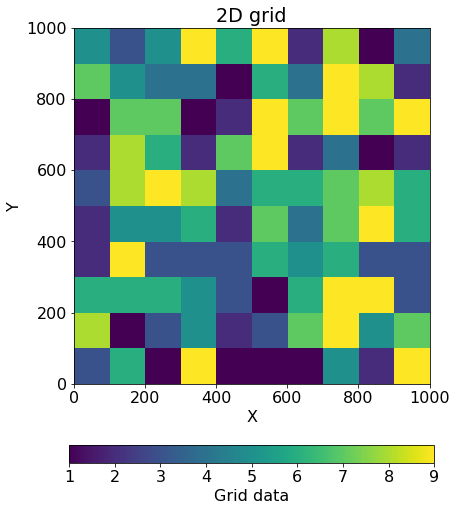

In [5]:
# define a grid with random values and create plot
nx = 10
ny = 10
dx = 100
dy = 100
g1 = Grid(nx = nx, ny = ny, 
          dx = dx, dy = dy, 
          grid_data = np.random.randint(1,10,size=(nx,ny)))

# create the plot
g1.plot()

The definition of this plot function within the object is not only useful because it combines a lot of commands into one function (we could do the same, of course, for a standard procedural approach with one function!), but because we gave it a very simple, intuitive and easy to remember name: `plot`! 

Here a bit of more thought on this point: the function `plot` is defined as an object function - so it is available only to the object and strictly defined in its "namespace". This means that we can, without causing any problem, have another object that *also* has a function `plot()` - for example: think about a class definition for a line plot, maybe for a gamma-ray borehole log: an object of this class can have a `plot()` method as well - which creates an appropriate plot for this type of data!

<a id="nbex"></a>
## Exercise: extend the grid class

Of course, it would be nice if we would get a proper name for the grid (in the title) and for the meaning of the grid data in the colorbar label. Here a little exercise for you:

Extend the Grid class definition:

1. Add a function to provide a name for the grid (as title) and store it in a local variable (e.g. "Temperature distribution")
2. Add a function to provide a name for the data type and unit and store it in variables (e.g. type: Temperature, unit: C)
3. Extend the '__init__()' function to optionally set these variables during object generation (like dx, dy etc.)
4. Extend the `plot()` function to set plot title and colorbar label accordingly - if these names are defined!

I included the template for you - now add the required features:


In [6]:
import matplotlib.pyplot as plt
import copy
class Grid():
    
    
    #
    # To Do (1): include appropriate checks for keywords and set variables, if provided:
    #
    # Add the keywords as:
    # grid_title : the title of the grid (e.g. "Temperature distrubution")
    # var_name : name of data type (e.g. "Temperature")
    # var_unit : unit of data (e.g. "C")
    def __init__(self, **kwds):
        if 'nx' in kwds and 'ny' in kwds:
            self.set_nxny(kwds['nx'], kwds['ny'])
        if 'dx' in kwds and 'dy' in kwds:
            self.set_dxdy(kwds['dx'], kwds['dy'])
        if 'grid_data' in kwds:
            self.set_grid(kwds['grid_data'])
        if 'grid_title' in kwds:
            self.set_grid_title(kwds['grid_title'])
        if 'var_name' in kwds:
            self.set_variable_name(kwds['var_name'])
        if 'var_unit' in kwds:
            self.set_variable_unit(kwds['var_unit'])        


    #
    # To Do (2): complete the following functions to set title, name and unit:
    #
    def set_grid_title(self, grid_title):
        # delete pass and enter your code:
        self._grid_title = grid_title
    
    def set_variable_name(self, var_name):
        # delete pass and enter your code:
        self._var_name = var_name

    def set_variable_unit(self, var_unit):
        # delete pass and enter your code:
        self._var_unit = var_unit
    
    # include the plot function here:
    def plot(self):
        plt.figure(figsize=(8,8))
        extent = [0., self._extent_x, 0., self._extent_y]
        im = plt.imshow(self._grid_data, extent = extent,
                  interpolation = 'nearest', cmap = 'viridis')
        cbar = plt.colorbar(im, orientation = 'horizontal', fraction=0.042, pad=0.14)
        #
        # To Do (3): check if variable name and unit are defined, and if so: adjust label
        if hasattr(self, '_var_name') and hasattr(self, '_var_unit'):
            cbar.set_label(self._var_name+' [' + self._var_unit+']')
        else:
            cbar.set_label("Grid data")
        plt.xlabel("X")
        plt.ylabel("Y")
        #
        # To Do (4): check if grid title is defined, and if so: adjust title
        if hasattr(self, '_grid_title'):
            tit = self._grid_title
        else:
            tit = "2D grid"
        plt.title(tit)
        
        plt.show()
    
    
    # operator overloading
    def __add__(self, rhs):
        # (1) Check the type of the "rhs" variable
        if isinstance(rhs, Grid):
            # (2) create a copy of the 
            new_grid = copy.deepcopy(self)
            # (3) perform addition of grid data
            new_grid._grid_data = self._grid_data + rhs._grid_data
        else:
            new_grid = copy.deepcopy(self)
            new_grid._grid_data = self._grid_data + rhs
        # now we return the updated object entirely:
        return new_grid
        
    # function that provides information when used with print statement
    def __repr__(self):
        # Idea: we construct a string with the information and return it:
        # (1) basic information:
        info_string = "Grid object with 2-D grid data\n"
        # (2) info on grid cells, spacing, extent:
        info_string += "Number of cells\t= (%d, %d)\n" % (self._nx, self._ny)
        info_string += "Cell dimension\t= (%.1f, %.1f)\n" % (self._dx, self._dy)
        info_string += "Grid extent\t= (%.1f, %.1f)\n" % (self._extent_x, self._extent_y)
        # (3) add some information and statistics on grid values:
        info_string += "Grid data is of type %s with:\n" % type(self._grid_data[0,0])
        info_string += "Min value = %.1f\n" % (np.min(self._grid_data))
        info_string += "Max value = %.1f\n" % (np.max(self._grid_data))
        info_string += "Mean value = %.1f\n" % (np.mean(self._grid_data))
        return info_string

    def set_grid(self,grid_data):
        new_nx, new_ny = grid_data.shape
        if new_nx != self._nx: 
            print("nx is not the right dimension!")
            raise AttributeError
        if new_ny != self._ny: 
            print("nx is not the right dimension!")
            raise AttributeError
        self._grid_data = grid_data

    def get_grid(self):
        return self._grid_data
        
    def update_extent(self):
        # first: check if both number of cells and cell widths are already defined
        if hasattr(self, '_dx') and hasattr(self, '_nx'):
            self._extent_x = self._nx * self._dx
            self._extent_y = self._ny * self._dy
    
    def get_extent(self):
        return (self._extent_x, self._extent_y)
        
    def set_nxny(self, nx, ny):
        self._nx = nx
        self._ny = ny
        self.update_extent()

    def get_nxny(self):
        return (self._nx, self._ny)
        
    def set_dxdy(self, dx, dy):
        self._dx = dx
        self._dy = dy
        self.update_extent()

    def get_dxdy(self):
        return (self._dx, self._dy)

And if you implemented everything correctly, then the commands in the next cell should work well:

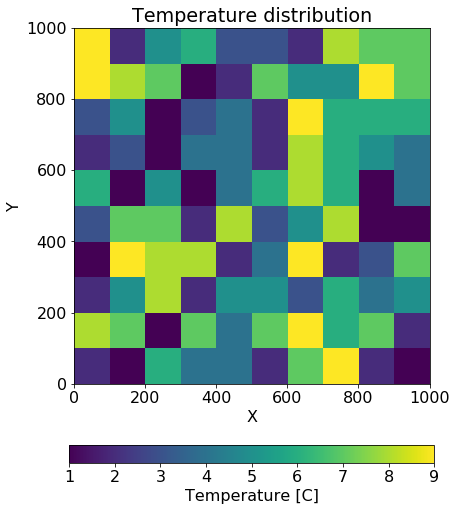

In [11]:
# define a grid with random values
g1 = Grid(nx = nx, ny = ny, dx = dx, dy = dy,
          grid_title = "Temperature distribution",
          var_name = "Temperature",
          var_unit = "C",
          grid_data = np.random.randint(1,10,size=(nx,ny)))

# create the plot
g1.plot()

<a id="nbinherit"></a>
## Inheritance - and a (hopefully) familiar example

Inheritance is a fundamental concept of object-oriented programming and one of the aspects that might feel a bit strange at the beginning - but it does also become quite powerful once you are used to it.

The basic idea is the following: you can create a new class on the basis of an existing class by taking over all the information of that existing class (the "parent") into your new class (the "child") - and then adding more features to it.

Here an example for our Grid class: let's assume that, for some reason (maybe because you have an assignment to do...), you want to calculate the drawdown due to pumping in one or multiple wells for a given model range. 

So, we might want to define a class `DrawdownGrid`. Of course, we need to define the grid range, number of grid cells in each direction, cell sizes, title, etc. - just as before. Well, we have already written quite ab bit of code above and it would be nice to re-use it!

Luckily, this is exactly what inheritance is good for!

We can create our new class and take over all the basic information from our Grid class by inheritance:


In [12]:
# simply write the class you want to inherite from within the round brackets:
class DrawdownGrid(Grid):
    pass



Without any further things, we can now already create a new objects with the functions from the original grid class:

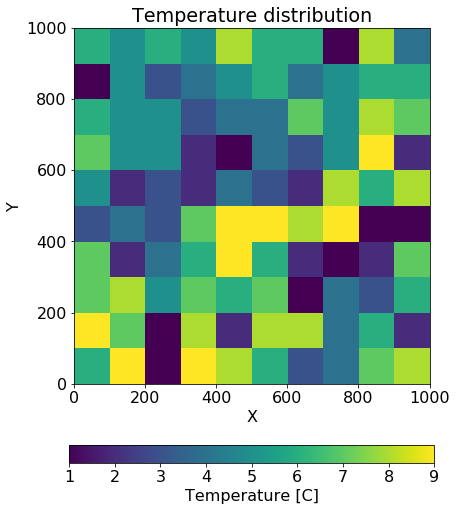

In [13]:
# define the grid range
nx = 10
ny = 10
dx = 100
dy = 100

# create object
drawdown_obj = DrawdownGrid(nx = nx, ny = nx, dx = dx, dy = dy,
          grid_title = "Temperature distribution",
          var_name = "Temperature",
          var_unit = "C",
          grid_data = np.random.randint(1,10,size=(nx,ny)))

# create plot
drawdown_obj.plot()

Up to now, our new class simply acts like a copy of the grid class. Now, let's start to add some features for our pumping experiment!

We need to think about the new features that we want to add to this class:

1. Set a base hydraulic head for the entire model
2. Define aquifer properties (Transmissivity, Storativity) as those are equal for the entire range.
3. Add a function to calculate the effect of wells on the resulting hydraulic head in the model

In addition, we could consider the following extensions:

1. Adjust the plot settings to give us a plot that we consider meaningful in this context (maybe: interpolated values with overlying contour plot - also another colour scheme might be nice: maybe blue?)
<a id="nbhead"></a>
### Define hydraulic head

The first step is very easy to implement: simply add a function `set_hydraulic_head()` to the new class which updates the grid values for each cell with this base value:



In [14]:
# simply write the class you want to inherite from within the round brackets:
class DrawdownGrid(Grid):

    def set_hydraulic_head(self, head):
        self._grid_data = np.ones((self._nx, self._ny)) * head
        

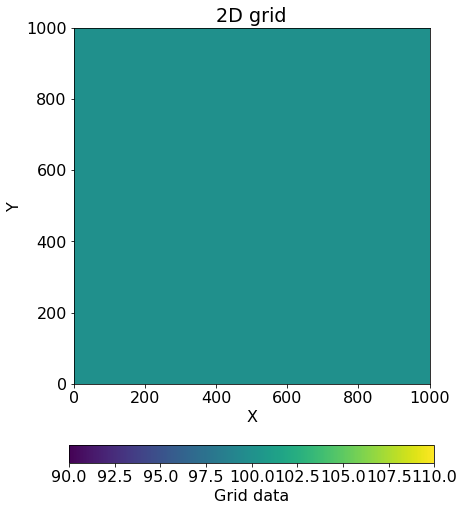

In [15]:
# define the grid range
nx = 10
ny = 10
dx = 100
dy = 100

# create object
drawdown_obj = DrawdownGrid(nx = nx, ny = nx, dx = dx, dy = dy)

# set hydraulic head
drawdown_obj.set_hydraulic_head(100)

# create plot - which is now looking a bit boring
drawdown_obj.plot()

Of course, this new function is now only available for objects of the type `DrawdownGrid` - and not for the objects of type `Grid`!

<a id="nbaquifer"></a>
### Add functions to set aquifer properties

Adding these values is straight-forward, just as in several examples before:

In [16]:
class DrawdownGrid(Grid):

    def set_hydraulic_head(self, head):
        self._grid_data = np.ones((self._nx, self._ny)) * head
        
    def set_transmissivity(self, transmissivity):
        self._transmissivity = transmissivity
    
    def set_storativity(self, storativity):
        self._storativity = storativity


<a id="nbwell"></a>
### Add a well

Next step: add function to consider drawdown of a well. This a bit more tricky because we need to perform several steps - just as in the assignment. There are, of course, several ways to do this, here the steps I am taking:

- I am creating a function to add a well at a position (x,y) in the grid. 
- Based on this position, I am calculating a "distance grid", as in our assignment. - Then, I calculate the drawdown. The function to calculate the drawdown itself is also defined as a class function.
- The calculation of the "distance grid" requires one more consideration: it is logical that the value of a grid cell, as we defined them in our main `Grid` class, is assigned to the center of the cell. So, we need to define a grid of these cell center first - and then use it to calculate the distance grid. 
- Finally, the drawdown values are subtracted from the grid values to consider the effect of this well.

Here all those steps in the class:


In [17]:
import math # for math.factorial function
import scipy.special
class DrawdownGrid(Grid):

    def set_hydraulic_head(self, head):
        self._grid_data = np.ones((self._nx, self._ny)) * head
        
    def set_transmissivity(self, transmissivity):
        self._transmissivity = transmissivity
    
    def set_storativity(self, storativity):
        self._storativity = storativity

    # Define drawdown functions - just as in the assignment, but
    # now as class functions:
    def w_approx(self, u):
        """Approximation of well function"""
        return 0.5772 - np.log(u) + u - u**2 / (2 * math.factorial(2)) + \
                u**3 / (3 * math.factorial(3)) - u**4 / (4 * math.factorial(4))
        
    def w(self, u):
        return 1 - scipy.special.expi(-u)

    # define the theis function - note that we don't need to pass
    # transmissivity and storativity as they are defined for the entire
    # grid as class variables!
    def theis(self, Q, t, r):

        u = r**2 * self._storativity / (4 * self._transmissivity * t)
        # calculate well function
        return Q / (4 * np.pi * self._transmissivity) * self.w(u)
    
    # Calculate the cell centers in each axis direction
    # Suggestion: to better understand the following commands: draw a figure
    # of the grid and the cell centers
    def calc_cell_centers(self):
        self._cell_centers_x = np.arange(self._dx/2., self._extent_x, self._dx)
        self._cell_centers_y = np.arange(self._dy/2., self._extent_y, self._dy)

    # Now, here finally the function to add the well:
    def add_well(self, x_pos, y_pos, Q, t):
        """Add well at position (x_pos, y_pos) with pumping rate Q and consider
        effect after a pumping of time t"""
        # Check first if the cell centers are already calculated - if not, do so:
        if not hasattr(self, '_cell_centers_x'):
            self.calc_cell_centers()
            
        # (1) determine initial grid for cell centers
        X,Y = np.meshgrid(self._cell_centers_x, self._cell_centers_y)
        
        # (2) determine distance grid
        r = np.sqrt((x_pos - X)**2 + (y_pos - Y)**2)
        
        # (3) calculate drawdown
        s = self.theis(Q, t, r)
        
        # (4) subtract drawdown from hydraulic head field:
        self._grid_data -= s
        

Here now an example:

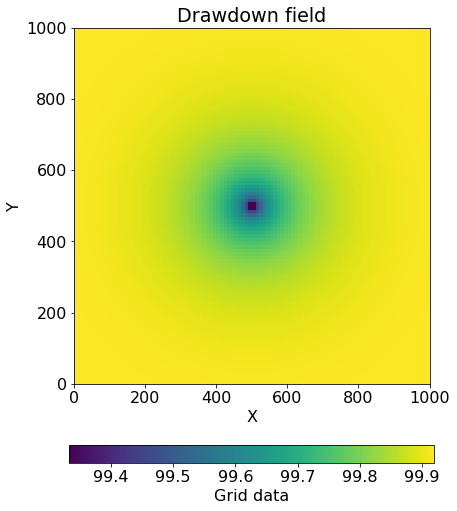

In [20]:
# define the grid range
nx = 100
ny = 100
dx = 10
dy = 10

# create object
drawdown_field = DrawdownGrid(nx = nx, ny = nx, dx = dx, dy = dy, grid_title = "Drawdown field")

# set aquifer properties
drawdown_field.set_hydraulic_head(100)
drawdown_field.set_transmissivity(1E0)
drawdown_field.set_storativity(0.1)

# Define and add the well:
well_x_pos = 500
well_y_pos = 500
Q = 1.
t = 3600.
drawdown_field.add_well(well_x_pos, well_y_pos, Q, t)

# Create a plot
drawdown_field.plot()


Imagine you now want to add the effect of another producing well - and in addition maybe even an injection well. These steps are now very simply:


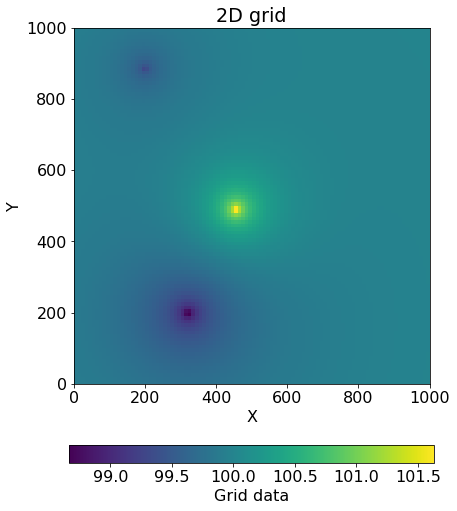

In [21]:
# First steps as before:

# define the grid range
nx = 100
ny = 100
dx = 10
dy = 10

# create object
drawdown_field = DrawdownGrid(nx = nx, ny = nx, dx = dx, dy = dy)

# set aquifer properties
drawdown_field.set_hydraulic_head(100)
drawdown_field.set_transmissivity(1E0)
drawdown_field.set_storativity(0.1)

# Define the first producing well, at an arbitrary position:
well_x_pos = 199.2
well_y_pos = 114.0
Q = 1.
t = 3600.
drawdown_field.add_well(well_x_pos, well_y_pos, Q, t)

# Second producer - has only been active for some less time but with double the pumping rate
well_x_pos = 321.0
well_y_pos = 801.12
Q = 2.
t = 7200.
drawdown_field.add_well(well_x_pos, well_y_pos, Q, t)

# Let's now add an injecting well near the center:
well_x_pos = 455,
well_y_pos = 510.
Q = -3. # negative "pumping" for injection
t = 1800.
drawdown_field.add_well(well_x_pos, well_y_pos, Q, t)


# Create a plot
drawdown_field.plot()



We now obtained a method to determine the resulting hydraulic head for an entire field with multiple extraction and injection wells at arbitrary positions!

Of course, our "drawdown grid" is based on many, many simplifying assumptions (where the strongest probably is the assumption of complete homogeneity and the constant thickness over the entire range). Still, the method that we used here is not so terribly far away from methods that are still commonly used in engineering applications! 

Actually, this type of modelling - superposing drawdown fields of multiple wells - has been used quite a bit at some stage. It is known as "analytic modelling" and I am sure you can see where this name comes from.







<a id="nbsummary"></a>
## Summary

This exercise notebook has been quite intense - congratulations if you made it all the way to here!

The aim of this notebook is to provide you with an introduction to object-oriented programming - exemplified with something useful.

If you want to restart you can go [back to top](#nbtop)